# Multiple Conditional Flow:

Here we implement a two level of conditional flow where:
- First you select a brand.
- Then a filter is applied to the item returned from first filter.

In [ ]:
from typing import TypedDict,  List, Union

class Item(TypedDict):
    brand: str
    design_rating: float
    performance_rating: float
    heating_rating: float
    price: float

class Query(TypedDict):
    brand: str
    query: str



class AgentState(TypedDict):
    items: List[Item]
    brand_filtered: List[Item]
    final_items : List[Item]
    query: Query



In [8]:
from langgraph.graph import StateGraph, START, END


graph= StateGraph(AgentState)


def decide_brand_filter(state: AgentState) -> AgentState:
    if state['brand_filtered'] == 'iphone':
        return 'filter_iphones'
    if state['brand_filtered'] == 'android':
        return 'filter_android'

def search_iphones(state: AgentState) -> AgentState:
    return state

def search_android(state: AgentState) -> AgentState:
    return state


def search_design_vs_performance(state: AgentState) -> AgentState:
    return state

def check_filters(state: AgentState) -> AgentState:
    query = state['query']['query']
    if query == 'budget phone with low heating':
        return 'low_price_low_heating'
    if query == 'best performance with best design':
        return 'high_performance_best_design'

# 
graph.add_node('check_brand', lambda state: state)

# first conditional flow
graph.add_node('search_iphones', search_iphones)
graph.add_node('search_android', search_android)


graph.add_edge(START, 'check_brand')
graph.add_conditional_edges(
    "check_brand",
    decide_brand_filter,
    {
        'filter_iphones': 'search_iphones',
        'filter_android': 'search_android'
    }
)

# 
graph.add_edge('search_iphones', 'check_filter')
graph.add_edge('search_android', 'check_filter')


# devcision filter: branch
graph.add_node('filter_cheapest_low_heating', lambda state: state)
graph.add_node('filter_performant_best_design', lambda state: state)

graph.add_node('check_filter', lambda state: state)
graph.add_conditional_edges(
    'check_filter',
    check_filters,
    {
        'low_price_low_heating': 'filter_cheapest_low_heating',
        'high_performance_best_design': 'filter_performant_best_design'
    }
)

graph.add_edge('filter_cheapest_low_heating', END)
graph.add_edge('filter_performant_best_design', END)


agent = graph.compile()

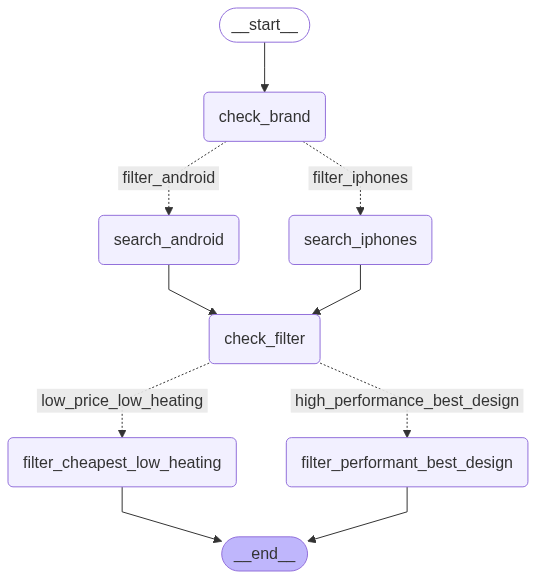

In [9]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

Here, we have two conditional edges:
- check_brand
- check_filter

Here, those nodes are just a runnable pass through. Further connected to conditional edge based on condition.
Also, they are used in merging the flow.